# PHY480/905 Semester Project

#### PHY 480/905 Semester Project
### &#9989; Daniel Weatherspoon

#### &#9989; Last Updated on 4/23/23

# ___Double Pendulum___

##  Introduction 

- How does the motion of the double pendulum depend on the initial conditions?
- How does the motion of the double pendulum depend on mass and length?
- Can the double pendulum be used as a model for other physical systems? Or what are practical uses for knowing this information?

## Methodology

In [1]:
# Imports
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
import sympy as sym
from matplotlib.animation import PillowWriter
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# symbols
t, g = sym.symbols('t, g')
m1, m2 = sym.symbols('m1, m2')
L1, L2 = sym.symbols('L1, L2')
theta1, theta2 = sym.symbols(r'\theta_1, \theta_2', cls=sym.Function)

In [3]:
# make them functions of time
theta1 = theta1(t)
theta2 = theta2(t)

In [4]:
# define derivatives (_d) and second derivatives (_dd)
theta1_d = sym.diff(theta1, t)
theta2_d = sym.diff(theta2, t)

theta1_dd = sym.diff(theta1_d, t)
theta2_dd = sym.diff(theta2_d, t)

In [5]:
# define x and y
x1 = L1 * sym.sin(theta1)
y1 = -L1 * sym.cos(theta1)
x2 = L1 * sym.sin(theta1) + L2 * sym.sin(theta2)
y2 = -L1 * sym.cos(theta1) - L2 * sym.cos(theta2)

In [6]:
# Define Energies and Langragian

# Kinetic
T1 = 1/2 * m1 * (sym.diff(x1, t)**2 + sym.diff(y1, t)**2)
T2 = 1/2 * m2 * (sym.diff(x2, t)**2 + sym.diff(y2, t)**2)
T = T1 + T2
# Potential
V1 = m1 * g * y1
V2 = m2 * g * y2
V = V1 + V2
# Lagrangian
L = T - V

In [7]:
# Langrange Equations

eqL1 = sym.diff(L, theta1) - sym.diff(sym.diff(L, theta1_d), t).simplify()
eqL2 = sym.diff(L, theta2) - sym.diff(sym.diff(L, theta2_d), t).simplify()

In [8]:
# Solve Langrange

sols = sym.solve([eqL1, eqL2], (theta1_dd, theta2_dd), 
                 simplify=False, rational=False)

In [9]:
# Turning 2nd Orders Into 1st Orders Since Python Doesn't Solve 2nd Orders (Numerically)
# lambdify turns symbols into math/python usable functions
fdz1dt = sym.lambdify((t,g,m1,m2,L1,L2,theta1,theta2,theta1_d,theta2_d), sols[theta1_dd])
fdz2dt = sym.lambdify((t,g,m1,m2,L1,L2,theta1,theta2,theta1_d,theta2_d), sols[theta2_dd])
fdthe1dt = sym.lambdify(theta1_d, theta1_d)
fdthe2dt = sym.lambdify(theta2_d, theta2_d)

In [10]:
# Define S and dS/dt, the system of ODEs

def dSdt(S, t, g, m1, m2, L1, L2):
    theta1, z1, theta2, z2 = S
    return [
        fdthe1dt(z1),
        fdz1dt(t, g, m1, m2, L1, L2, theta1, theta2, z1, z2),
        fdthe2dt(z2),
        fdz2dt(t, g, m1, m2, L1, L2, theta1, theta2, z1, z2),]

In [ ]:
#  Solve system of ODEs using scipy's odeint

#  define variables first

# t = np.linspace(0, 40, 1001)
# g = 9.81
# m1 = 2 #2
# m2 = 1 #1
# L1 = 2 #2
# L2 = 1 #1
# sols = odeint(dSdt, y0=[1, -3, -1, 5], t=t, args=(g,m1,m2,L1,L2))

In [ ]:
# type(sols.T) #check to see if array

In [ ]:
# theta1, theta 2 as functions of time

# theta1 = sols.T[0]
# theta2 = sols.T[2]

In [ ]:
# test plot
# plt.plot(t, theta1, 'g')

In [ ]:
# define function to return location of the two masses

# def position(t, theta1, theta2, L1, L2):
#     return (L1 * np.sin(theta1),
#             -L1 * np.cos(theta1),
#             L1 * np.sin(theta1) + L2 * np.sin(theta2),
#             -L1 * np.cos(theta1) - L2 * np.cos(theta2))

# x1, y1, x2, y2 = position(t, sols.T[0], sols.T[2], L1, L2)

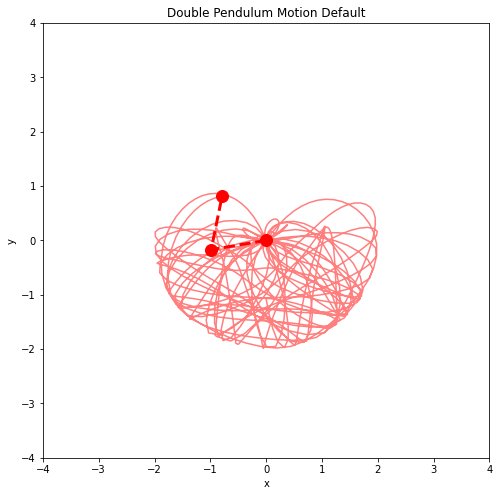

In [11]:
# When all is equal

# Solve system of ODEs using scipy's odeint
# define variables first

t = np.linspace(0, 40, 1001) #time array
g = 9.81 # gravity 
m1 = 1 # mass 1
m2 = 1 # mass 2
L1 = 1  # arm 1
L2 = 1  # arm 2
sols = odeint(dSdt, y0=[1, -3, -1, 5], t=t, args=(g,m1,m2,L1,L2)) #odeint solving system of equations

# make theta1, theta 2 as functions of time
theta1 = sols.T[0]
theta2 = sols.T[2]

# define function to return location of the two masses

def position(t, theta1, theta2, L1, L2):
    return (L1 * np.sin(theta1),
            -L1 * np.cos(theta1),
            L1 * np.sin(theta1) + L2 * np.sin(theta2),
            -L1 * np.cos(theta1) - L2 * np.cos(theta2))

x1, y1, x2, y2 = position(t, sols.T[0], sols.T[2], L1, L2) # set positions

# to animate 
def animate(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]]) #lines 
    ln1_trail.set_data(np.append(ln1_trail.get_xdata(), x2[i]), # makes trail of line 1
                       np.append(ln1_trail.get_ydata(), y2[i]))
    
    return ln1, ln1_trail
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_facecolor('w')

ln1, = plt.plot([], [], 'ro--', lw=3, markersize=12) 
ln1_trail, = ax.plot([], [], 'r-', alpha=0.5) # Trail of Mass 1
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Double Pendulum Motion Default')
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('pendefault.gif',writer='pillow',fps=25)

<img src="pendefault.gif" width="750" align="center">

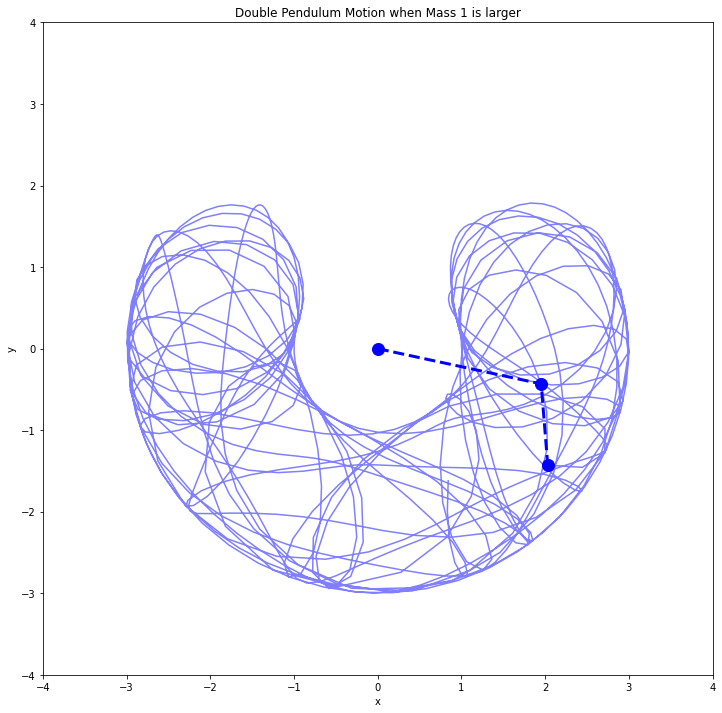

In [12]:
# Mass 1 larger 
t = np.linspace(0, 40, 1001)
g = 9.81
m1 = 10 
m2 = 1 
L1 = 2 
L2 = 1 
sols = odeint(dSdt, y0=[1, -3, -1, 5], t=t, args=(g,m1,m2,L1,L2))

theta1 = sols.T[0]
theta2 = sols.T[2]

def position(t, theta1, theta2, L1, L2):
    return (L1 * np.sin(theta1),
            -L1 * np.cos(theta1),
            L1 * np.sin(theta1) + L2 * np.sin(theta2),
            -L1 * np.cos(theta1) - L2 * np.cos(theta2))

x1, y1, x2, y2 = position(t, sols.T[0], sols.T[2], L1, L2)

def animate(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    ln1_trail.set_data(np.append(ln1_trail.get_xdata(), x2[i]),
                       np.append(ln1_trail.get_ydata(), y2[i]))
    
    return ln1, ln1_trail
    
fig, ax = plt.subplots(1,1, figsize=(12,12))
ax.set_facecolor('w')
ln1, = plt.plot([], [], 'bo--', lw=3, markersize=12) #marker = 8, 
ln1_trail, = ax.plot([], [], 'b-', alpha=0.5) # Trail of Mass 1
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Double Pendulum Motion when Mass 1 is larger')
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('penM1.gif',writer='pillow',fps=25)

<img src="penM1.gif" width="750" align="center">

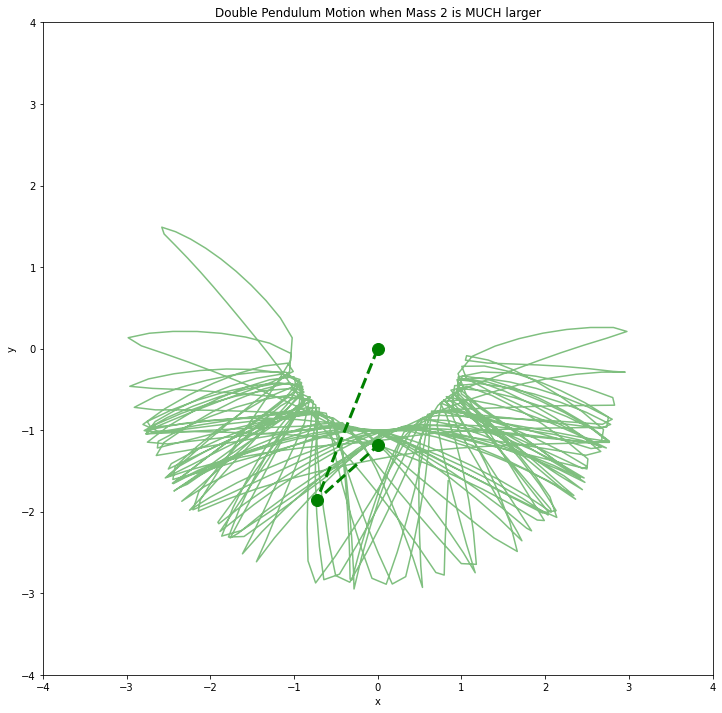

In [13]:
# Mass 2 MUCH larger DON'T TOUCH
t = np.linspace(0, 40, 1001)
g = 9.81
m1 = 10 
m2 = 100 
L1 = 2 
L2 = 1 
sols = odeint(dSdt, y0=[1, -3, -1, 5], t=t, args=(g,m1,m2,L1,L2))

theta1 = sols.T[0]
theta2 = sols.T[2]

def position(t, theta1, theta2, L1, L2):
    return (L1 * np.sin(theta1),
            -L1 * np.cos(theta1),
            L1 * np.sin(theta1) + L2 * np.sin(theta2),
            -L1 * np.cos(theta1) - L2 * np.cos(theta2))

x1, y1, x2, y2 = position(t, sols.T[0], sols.T[2], L1, L2)

def animate(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    ln1_trail.set_data(np.append(ln1_trail.get_xdata(), x2[i]),
                       np.append(ln1_trail.get_ydata(), y2[i]))
    
    return ln1, ln1_trail
    
fig, ax = plt.subplots(1,1, figsize=(12,12))
ax.set_facecolor('w')
ln1, = plt.plot([], [], 'go--', lw=3, markersize=12) #marker = 8, 
ln1_trail, = ax.plot([], [], 'g-', alpha=0.5) # Trail of Mass 1
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Double Pendulum Motion when Mass 2 is MUCH larger')
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('penM2.gif',writer='pillow',fps=25)

<img src="penM2.gif" width="750" align="center">

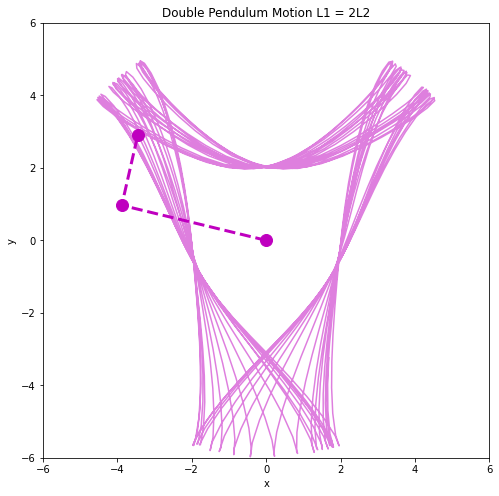

In [14]:
# When L1 is double L2 
# to animate
t = np.linspace(0, 40, 1001)
g = 9.81
m1 = 2 
m2 = 2 
L1 = 4 
L2 = 2 
sols = odeint(dSdt, y0=[1, -3, -1, 5], t=t, args=(g,m1,m2,L1,L2))

theta1 = sols.T[0]
theta2 = sols.T[2]

def position(t, theta1, theta2, L1, L2):
    return (L1 * np.sin(theta1),
            -L1 * np.cos(theta1),
            L1 * np.sin(theta1) + L2 * np.sin(theta2),
            -L1 * np.cos(theta1) - L2 * np.cos(theta2))

x1, y1, x2, y2 = position(t, sols.T[0], sols.T[2], L1, L2)


def animate(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    ln1_trail.set_data(np.append(ln1_trail.get_xdata(), x2[i]),
                       np.append(ln1_trail.get_ydata(), y2[i]))
    
    return ln1, ln1_trail
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_facecolor('w')

ln1, = plt.plot([], [], 'mo--', lw=3, markersize=12) 
ln1_trail, = ax.plot([], [], 'm-', alpha=0.5) # Trail of Mass 1
ax.set_ylim(-6,6)
ax.set_xlim(-6,6)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Double Pendulum Motion L1 = 2L2')
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('penL1big.gif',writer='pillow',fps=25)

<img src="penL1big.gif" width="750" align="center">

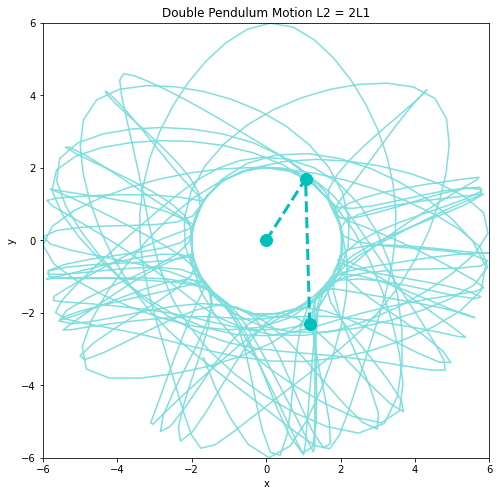

In [15]:
# When L2 is double L1 
# to animate
t = np.linspace(0, 40, 1001)
g = 9.81
m1 = 2 
m2 = 2 
L1 = 2 
L2 = 4
sols = odeint(dSdt, y0=[1, -3, -1, 5], t=t, args=(g,m1,m2,L1,L2))

theta1 = sols.T[0]
theta2 = sols.T[2]

def position(t, theta1, theta2, L1, L2):
    return (L1 * np.sin(theta1),
            -L1 * np.cos(theta1),
            L1 * np.sin(theta1) + L2 * np.sin(theta2),
            -L1 * np.cos(theta1) - L2 * np.cos(theta2))

x1, y1, x2, y2 = position(t, sols.T[0], sols.T[2], L1, L2)


def animate(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    ln1_trail.set_data(np.append(ln1_trail.get_xdata(), x2[i]),
                       np.append(ln1_trail.get_ydata(), y2[i]))
    
    return ln1, ln1_trail
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_facecolor('w')

ln1, = plt.plot([], [], 'co--', lw=3, markersize=12) 
ln1_trail, = ax.plot([], [], 'c-', alpha=0.5) # Trail of Mass 1
ax.set_ylim(-6,6)
ax.set_xlim(-6,6)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Double Pendulum Motion L2 = 2L1')
ani2 = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani2.save('penL2big.gif',writer='pillow',fps=25)

<img src="penL2big.gif" width="750" align="center">

## Results and Discussion

# Important:
#### ****To save space and not enter all the code, can you please be understanding and know that I am going to use all of the saved GIFs of the animations in my project, it'll be so much processing power to rerun all of these just to show them under this section of the notebook****

Text(0.5, 1.0, 'Theta 1 Over Time')

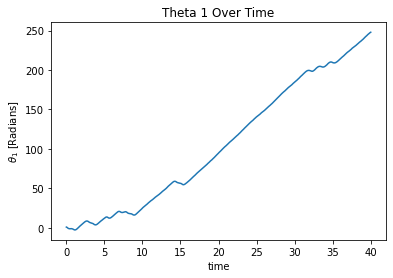

In [18]:
plt.plot(t, theta1)
plt.xlabel('time')
plt.ylabel(r'$\theta_1$ [Radians]')
plt.title('Theta 1 Over Time')
# this plot is irrelevant 

In [19]:
T

0.5*m1*(L1**2*sin(\theta_1(t))**2*Derivative(\theta_1(t), t)**2 + L1**2*cos(\theta_1(t))**2*Derivative(\theta_1(t), t)**2) + 0.5*m2*((L1*sin(\theta_1(t))*Derivative(\theta_1(t), t) + L2*sin(\theta_2(t))*Derivative(\theta_2(t), t))**2 + (L1*cos(\theta_1(t))*Derivative(\theta_1(t), t) + L2*cos(\theta_2(t))*Derivative(\theta_2(t), t))**2)

In [20]:
V

-L1*g*m1*cos(\theta_1(t)) + g*m2*(-L1*cos(\theta_1(t)) - L2*cos(\theta_2(t)))

In [21]:
L = T - V
L

L1*g*m1*cos(\theta_1(t)) - g*m2*(-L1*cos(\theta_1(t)) - L2*cos(\theta_2(t))) + 0.5*m1*(L1**2*sin(\theta_1(t))**2*Derivative(\theta_1(t), t)**2 + L1**2*cos(\theta_1(t))**2*Derivative(\theta_1(t), t)**2) + 0.5*m2*((L1*sin(\theta_1(t))*Derivative(\theta_1(t), t) + L2*sin(\theta_2(t))*Derivative(\theta_2(t), t))**2 + (L1*cos(\theta_1(t))*Derivative(\theta_1(t), t) + L2*cos(\theta_2(t))*Derivative(\theta_2(t), t))**2)

### Based on my questions:

**1: Even a small change to any parameter (L1, L2, M1, M2) can drastically affect how the pendulum behaves over time, it appears as if changing the masses has the least affect while leaving the lengths the same. Making 1 mass either slightly larger and much larger still gives pretty much the same motion in the end. I did not experiment with changing thetas too much since I'm more focused on the physical properties of it.**

**2: When focusing on mass and length of the double pendulum, increasing the arm range has drastic affects on it because it gives the pendulum more range of motion, which can lead to chaotic behavior. However, increasing the mass of pendulum bob gives it more intertia and more resistence to other forces, which again involves more chaotic behavior.**

**3: The motion of a double pendulum can represent a physical system such as the motion of celestial bodies. For example, it can model a moon orbiting a planet, or a planet orbiting a star. The double pendulum represents a two-body problem, each arm represents a celestial body. We can make this assumption because both systems follow the same laws of motion and universal gravitation. By analyzing the motion of the double pendulum, we can relate it to the behavior of celestial bodies and make predictions about their orbits. We can use the principles of energy conservation and angular momentum to predict the shape and stability of planetary orbits, as well as the motion of objects in gravitational fields. Important to note that this is a simplified case, and does not account for everything that has an impact on celestial bodies. This model must be used along with others to get more accurate predictions.**

 

##  Conclusion and Perspectives

Things I would do differently next time:
- Include more about how the change in angles can affect the model.
- Wanted to try to plot the kinetic and potential energy over time as the pendulums swing, so I would do that next time. 
- Get more ranges of motion that the model can show. 

Things I learned: 
- How sensitive this model is to even the slightest change in initial conditions. Changing mass or length by a factor of even 1.2 can change the system drastically.

The one obstacle I ran into from this was how much computational power is needed, and also, the plots don't move on jupyter but only when I save them. 

## References

Assencio, Diego. “The Double Pendulum: Lagrangian Formulation.” The Double Pendulum: Lagrangian Formulation - Diego Assencio, https://diego.assencio.com/?index=1500c66ae7ab27bb0106467c68feebc6. 

“Differential Equations.” Double Pendulum, https://math24.net/double-pendulum.html. 

“MatLab Help.” MATLAB Answers - MATLAB Central, https://www.mathworks.com/matlabcentral/answers/282940-what-is-the-ro-in-plot-mean. 

***Did not use exact code but got my ideas based on PHY 321 course single pendulum model***

##  Appendices


In [22]:
def dSdt(S, t, g, m1, m2, L1, L2):
    theta1, z1, theta2, z2 = S
    return [
        fdthe1dt(z1),
        fdz1dt(t, g, m1, m2, L1, L2, theta1, theta2, z1, z2),
        fdthe2dt(z2),
        fdz2dt(t, g, m1, m2, L1, L2, theta1, theta2, z1, z2),]

t = np.linspace(0, 40, 1001) #time array
g = 9.81 # gravity 
m1 = 1 # mass 1
m2 = 1 # mass 2
L1 = 1  # arm 1
L2 = 1  # arm 2
sols = odeint(dSdt, y0=[1, -3, -1, 5], t=t, args=(g,m1,m2,L1,L2)) #odeint solving system of equations

sols

array([[  1.        ,  -3.        ,  -1.        ,   5.        ],
       [  0.86496501,  -3.77982973,  -0.79032188,   5.55199738],
       [  0.69380662,  -4.85308129,  -0.54860374,   6.65798128],
       ...,
       [-13.91800724,  -1.27831399,  21.93077988,  -3.43248606],
       [-13.96567525,  -1.10308357,  21.79484239,  -3.37303176],
       [-14.00615971,  -0.92072049,  21.66026285,  -3.36416856]])